<a href="https://colab.research.google.com/github/aitormorais/Qiskit/blob/main/Algoritmo_genetico_tsp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para implementar una versión cuántica del algoritmo genético, puedes seguir estos pasos:

Familiarízate con la computación cuántica y las bibliotecas de Python:
Aprende sobre conceptos básicos de computación cuántica, como qubits, superposición, entrelazamiento y compuertas cuánticas. Para ello, puedes revisar recursos en línea, como el libro "Quantum Computing for Computer Scientists" de Noson S. Yanofsky y Mirco A. Mannucci, o el curso "Quantum Machine Learning" en el sitio web de Qiskit.

Selecciona una biblioteca de Python para la computación cuántica:
Existen varias bibliotecas de Python para trabajar con computadoras cuánticas, como Qiskit, Cirq, PennyLane y PyQuil. Investiga las características de cada una y elige la que mejor se adapte a tus necesidades y conocimientos.

Diseña el circuito cuántico para la representación del problema:
Representa las soluciones del problema del viajante (TSP) utilizando qubits y compuertas cuánticas. Puedes considerar el uso de "quantum annealing" o "QAOA (Quantum Approximate Optimization Algorithm)" para encontrar soluciones óptimas en un espacio de búsqueda cuántico.

Adapta las funciones de cruce, mutación y selección a la versión cuántica:
Reescribe las funciones de cruce, mutación y selección utilizando operaciones cuánticas y teniendo en cuenta las propiedades de la computación cuántica, como la superposición y el entrelazamiento.

Implementa una función de evaluación cuántica:
Crea una función de evaluación cuántica que calcule la calidad de las soluciones utilizando un enfoque cuántico. Para ello, puedes utilizar algoritmos cuánticos de optimización aproximada, como QAOA, para medir la calidad de las soluciones.

Ejecuta el algoritmo en un simulador cuántico o en una computadora cuántica real:
Ejecuta el algoritmo cuántico en un entorno simulado o en una computadora cuántica real si tienes acceso a través de la biblioteca que hayas elegido en el paso 2.

Compara el rendimiento de la versión cuántica con la versión clásica:
Analiza los resultados del algoritmo cuántico y compáralos con los del algoritmo genético clásico en términos de calidad de las soluciones y tiempo de ejecución.

Ten en cuenta que la computación cuántica todavía está en una etapa temprana, y es posible que no siempre ofrezca mejoras significativas en problemas como el TSP, especialmente para instancias pequeñas. Sin embargo, explorar algoritmos cuánticos puede ser útil para comprender cómo abordar problemas de optimización en el ámbito cuántico y cómo aprovechar las características únicas de la computación cuántica.

In [1]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install qiskit-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


QUANTUM

In [3]:
import numpy as np
from qiskit_optimization import QuadraticProgram


La función tsp_to_qubo convierte un problema del viajante (Travelling Salesman Problem, TSP) en un problema de optimización cuadrática sin restricciones binarias (Quadratic Unconstrained Binary Optimization, QUBO) utilizando el modelo de Ising. La función toma como entrada una matriz de distancias y devuelve un objeto QuadraticProgram de Qiskit que representa el problema QUBO.

A continuación, se detallan los pasos de la función tsp_to_qubo:

La función toma como entrada una matriz de distancias distance_matrix que representa las distancias entre las ciudades en el problema TSP. La matriz es cuadrada y simétrica, con una dimensión igual al número de ciudades en el problema.

Se crea un objeto QuadraticProgram vacío llamado qubo.

Se añaden variables binarias x_i,j al problema QUBO para cada par de ciudades i y j. Estas variables indican si el viajante va de la ciudad i a la ciudad j en su recorrido.

Se define la función de coste del problema QUBO, que es una función cuadrática de las variables x_i,j. La función de coste tiene en cuenta las distancias entre las ciudades y busca minimizar la distancia total del recorrido del viajante.

Se añaden restricciones al problema QUBO para garantizar que se encuentre una solución válida para el problema TSP. Estas restricciones incluyen:

Asegurar que cada ciudad sea visitada exactamente una vez.
Asegurar que el viajante salga de cada ciudad exactamente una vez.
Evitar subtours, es decir, que el viajante no repita ciudades en el recorrido.
La función devuelve el objeto QuadraticProgram que representa el problema QUBO correspondiente al problema TSP de entrada.

La función tsp_to_qubo permite convertir un problema TSP en un problema QUBO que puede ser resuelto utilizando algoritmos de optimización cuántica, como el algoritmo QAOA, en Qiskit.

FIN QUANTUM

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import numpy as np
import time

In [73]:
def generar_grafo(numero_ciudades):
    """Crea un grafo completo con distancias aleatorias entre los nodos."""
    n = numero_ciudades
    G = nx.complete_graph(n)
    for (u, v) in G.edges():
        G.edges[u, v]['distancia'] = random.randint(1, 10)
    return G,nx.get_edge_attributes(G, 'distancia')

In [76]:
def dibujar_grafo(G):
    """Dibuja el grafo con las etiquetas de nodos y distancias."""
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'distancia')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [62]:
def crear_poblacion(numero_ciudades):
    """Genera una lista de viajes aleatorios."""
    return [random.sample(range(numero_ciudades), numero_ciudades) for _ in range(numero_ciudades)]


obtener la distancia total del recorrido


In [ ]:
def distancia_entera(viaje,labels):
  suma = 0
  for pueblo in viaje:
    if pueblo == viaje[-1]:
      clave = (viaje[0],pueblo) if pueblo > viaje[0] else (pueblo,viaje[0])
      suma = suma +labels.get(clave, None)
    else:
      siguiente= viaje[viaje.index(pueblo)+1]
      clave = (pueblo,siguiente ) if siguiente > pueblo else (siguiente,pueblo)
      suma = suma +labels.get(clave, None)
  return suma


Almacenar distancia en un array

In [67]:
def almacenar_dist(viajes, labels):
    """Almacena las distancias de todos los recorridos en una lista."""
    return [distancia_entera(v, labels) for v in viajes]

Cruce

In [ ]:
def crucePMX(padre1,padre2):
    # generamos los puntos de corte aleatorios
    primero = random.randint(0, len(padre2)-2)
    segundo = random.randint(primero+1, len(padre2)-1)
    # creamos los bloques de los padres
    bloque_padre2 = padre2[primero:segundo]
    # creamos los hijos
    hijo1 = crear_hijo(padre1, padre2, bloque_padre2)
    return hijo1
  

In [ ]:
def crear_hijo(padre1, padre2, bloque_padre):
    # creamos el hijo
    padre1=list(padre1)
    hijo = [-1] * len(padre1)
    donde=bloque_padre[0]
    part1=padre1[:padre2.index(donde)]
    donde = bloque_padre[-1]
    part2=padre1[padre2.index(donde)+1:]
    pfinal=[]
    pinicio=[]
    for numero in part1:
      i = numero
      while i in bloque_padre:
        i = padre1[padre2.index(i)]
      pinicio.append(i)
    for numero in part2:
      i = numero
      while i in bloque_padre:
        i = padre1[padre2.index(i)]
      pfinal.append(i)  
    hijo=pinicio+bloque_padre+pfinal
    return hijo


Mutacion


In [ ]:
def swap_mutation(viaje):
    # seleccionar aleatoriamente dos posiciones distintas del individual
  pos1, pos2 = random.sample(range(len(viaje)), 2)
      # intercambiar los valores en esas posiciones
  viaje[pos1], viaje[pos2] = viaje[pos2], viaje[pos1]
  return viaje

Reemplazo

In [ ]:
def reemplazo_torneo(poblacion, hijo,labels):
    # seleccionar aleatoriamente un individuo de la población
    indice = random.randint(0, len(poblacion) - 1)
    # comparar el individuo con el hijo
    if distancia_entera(hijo,labels) < distancia_entera(poblacion[indice],labels):
        poblacion[indice] = hijo
    return poblacion


Seleccion

In [ ]:
def seleccion(poblacion,padre1):#una vez la seleccion torneo es hecha esto sirve para seleccionar al segundo padre
  lista_hijos=[]
  for padre in poblacion:
    if padre==padre1:
      lista_hijos.append(padre1)
      #cruce
    lista_hijos.append(crucePMX(padre1,padre))
  return lista_hijos


In [ ]:
def seleccion_torneo(poblacion,labels):
  distancia = almacenar_dist(poblacion,labels)
  dic=crear_dic_viaje_distancia(poblacion,distancia)
  i=0
  while i == 0:
    for k in dic.keys():
      primer_elemento=k
      i=1
      break 
  return primer_elemento


In [ ]:
def crear_dic_viaje_distancia(viajes,distancias):#funcion que crea un diccionario con los viajes y su respectiva distancia
  distancias_viajes = {}
  for i, viaje in enumerate(viajes):
    distancias_viajes[tuple(viaje)] = distancias[i]
  return dict(sorted(distancias_viajes.items(), key=lambda x: x[1]))

crear dicionario con los mejores rutas de los padres y de los hijo

In [ ]:
def nueva_mejor_ruta(distancias_viajes_1,distancias_viajes_2):
  nuevo_tamano = len(distancias_viajes_1)
  n = nuevo_tamano // 2
  # Selección de los mejores individuos del primer diccionario
  mejores_viajes_1 = list(distancias_viajes_1.keys())[:n]
  # Selección de los mejores individuos del segundo diccionario
  mejores_viajes_2 = list(distancias_viajes_2.keys())[:n]
  # Unión de las dos listas de los mejores individuos
  mejores_viajes = set(mejores_viajes_1 + mejores_viajes_2)
  # Si la longitud del conjunto de mejores individuos es menor que n, agregar los restantes en orden de aparición
  if len(mejores_viajes) < n:
      for viaje in list(distancias_viajes_1.keys())[n:]:
          if viaje not in mejores_viajes:
              mejores_viajes.add(viaje)
              if len(mejores_viajes) == n:
                  break
      for viaje in list(distancias_viajes_2.keys())[n:]:
          if viaje not in mejores_viajes:
              mejores_viajes.add(viaje)
              if len(mejores_viajes) == n*2:
                  break

  # Crear un nuevo diccionario que contenga solo los mejores individuos y sus distancias
  mejores_distancias_viajes = {}
  for viaje in mejores_viajes:
      if viaje in distancias_viajes_1:
          mejores_distancias_viajes[viaje] = distancias_viajes_1[viaje]
      else:
          mejores_distancias_viajes[viaje] = distancias_viajes_2[viaje]

  return mejores_distancias_viajes

Algoritmo genetico

In [90]:
def algoritmo_genetico(numero_ciudades,probabilidad,labels):
  #inicializamos variables
  hijos=[]
  hijos_dist=[]
  padres_dist=[]
  distancias_viajes_hijos = {}
  distancias_viajes_padres={}
  #primer paso: creamos el grafico de las ciudades.
  #grafo,labels=generar_grafo(numero_ciudades)
  #segundo paso creamos los viajes
  viajes=crear_poblacion(numero_ciudades)
  #establecemos el metodo de parada
  i=0
  while i<1000:
    #seleccion
    #primero seleccionaremos el mejor padre del recorrido para asi cruzarlo con el resto de viajes.
    padre1=seleccion_torneo(viajes,labels)
    #ahora aplicaremos el cruce con cada viaje para generar una lista de hijos
    hijos=seleccion(viajes,padre1)
    #mutaremos si procede alguno de los hijos
    for i in range(len(hijos)):
      if random.random()<probabilidad:
        hijos[i]=swap_mutation(hijos[i])
    for hijo in hijos:
      hijos_dist.append(distancia_entera(hijo,labels))
    for viaje in viajes:
      padres_dist.append(distancia_entera(viaje,labels))    
    #vamos a crear un diccionario para almacenar los viajes-con su distancia 
    distancias_viajes_hijos = crear_dic_viaje_distancia(hijos,hijos_dist)
    distancias_viajes_padres= crear_dic_viaje_distancia(viajes,padres_dist)
    #con los dos diccionarios creados toca crear uno nuevo con los mejores resultados de cada dic
    mejores=nueva_mejor_ruta(distancias_viajes_hijos,distancias_viajes_padres)
    #los ordenamos de mejor a peor.
    mejores=dict(sorted(mejores.items(), key=lambda x: x[1]))
    #ahora tendriamos que suplantar la lista viajes con los mejores viajes y la lista distancias con las mejores distancias
    #resetamos las variables
    hijos=[]
    hijos_dist=[]
    padres_dist=[]
    distancias_viajes_hijos = {}
    distancias_viajes_padres={}
    for distancia in mejores.values():
      padres_dist.append(distancia)
    for ruta in mejores.keys():
      viajes.append(list(ruta))
    i=i+1
  return viajes[0],padres_dist[0]



    
    



In [63]:
# @title Parámetros del algoritmo
numero_ciudades = 6  #@param {type:"integer"}
probabilidad = 0.89 #@param {type:"number", min:0, max:1, step:"0.01"}


In [77]:
g,labels=generar_grafo(numero_ciudades)

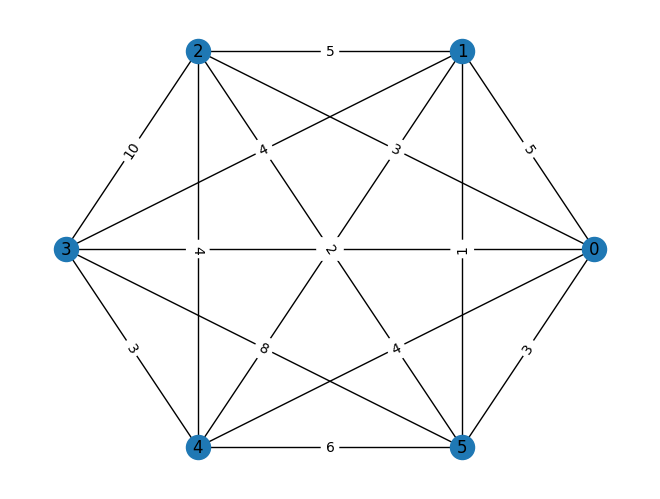

In [78]:
dibujar_grafo(g)

In [94]:
viaje,distancia=algoritmo_genetico(numero_ciudades,probabilidad,labels)

In [84]:
v,d=algoritmo_genetico(numero_ciudades,probabilidad,labels)

In [85]:
v

[0, 3, 2, 1, 5, 4]

In [86]:
d

17

In [95]:
viaje

[1, 0, 2, 4, 5, 3]

In [96]:
distancia

17

In [ ]:
viaje

[1, 5, 2, 3, 4, 0]

In [ ]:
distancia

18